# TensorFlow for Deep Learning Beginners 101

เอกสารประกอบ
- https://towardsdatascience.com/tensorflow-template-for-deep-learning-beginners-3b976d0ee084

![title](tensorflow.jpg)

# ตัวอย่าง XOR Problem

# 1.prepare dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
X1 = np.random.randint(0,2,size=200)
X2 = np.random.randint(0,2,size=200)
y = []
for i,j in zip(X1,X2):
    if(i==j):
      y.append(0)
    else:
      y.append(1)

In [22]:
df = pd.DataFrame({'X1':X1,'X2':X2,'y':y})
df.sample(5)

X1  X2  y
77    1   0  1
136   1   0  1
125   0   1  1
45    1   1  0
160   0   1  1

In [23]:
X = df[['X1','X2']]
y = df['y']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
len(X_train),len(X_test)

(140, 60)

# 2.define the model

In [27]:
import tensorflow as tf

In [36]:
# first neural network with keras tutorial
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=32, activation="relu"),
        tf.keras.layers.Dense(units=16, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid")
    ])

# 3.compile the model

In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= RMSprop(learning_rate=0.001),
              loss="binary_crossentropy", metrics=['accuracy'])

# 4.fit the model

In [68]:
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 1.0000
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 11/50
14/14 [

# 5.evaluation and prediction

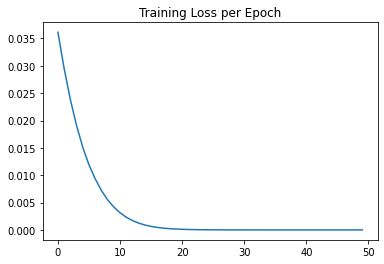

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt 

loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [70]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 2.5713e-08 - accuracy: 1.0000


[2.5713033480201375e-08, 1.0]

In [76]:
model.predict([[0,0],[1,1],[1,0],[0,1]])

array([[4.2436138e-08],
       [4.1387751e-09],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [80]:
# เหมือนกันเป็นศูนย์ ต่างกันเป็นศูนย์
model.predict([[5,0],[7,7],[9,1],[100,100]])

array([[1.0000000e+00],
       [1.5127886e-17],
       [1.0000000e+00],
       [0.0000000e+00]], dtype=float32)